In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Titanic-Dataset[1].csv")

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [5]:
from sklearn.metrics import (f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,classification_report,precision_recall_curve)

In [6]:
from sklearn import metrics

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [10]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.92500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.05000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.45830,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.86250,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.07500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.13330,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.07080,NaN,C


In [11]:
print('There are',df.shape[0] ,'rows and',len(df.axes[1]),'columns')

There are 891 rows and 12 columns


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00000,891.00000,891.00000,891,891,714.00000,891.00000,891.00000,891,891.00000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00000,0.38384,2.30864,NaN,NaN,29.69912,0.52301,0.38159,NaN,32.20421,NaN,NaN
std,257.35384,0.48659,0.83607,NaN,NaN,14.52650,1.10274,0.80606,NaN,49.69343,NaN,NaN
min,1.00000,0.00000,1.00000,NaN,NaN,0.42000,0.00000,0.00000,NaN,0.00000,NaN,NaN
25%,223.50000,0.00000,2.00000,NaN,NaN,20.12500,0.00000,0.00000,NaN,7.91040,NaN,NaN
50%,446.00000,0.00000,3.00000,NaN,NaN,28.00000,0.00000,0.00000,NaN,14.45420,NaN,NaN
75%,668.50000,1.00000,3.00000,NaN,NaN,38.00000,1.00000,0.00000,NaN,31.00000,NaN,NaN


In [16]:
#Exploratory Data Analysis (EDA)

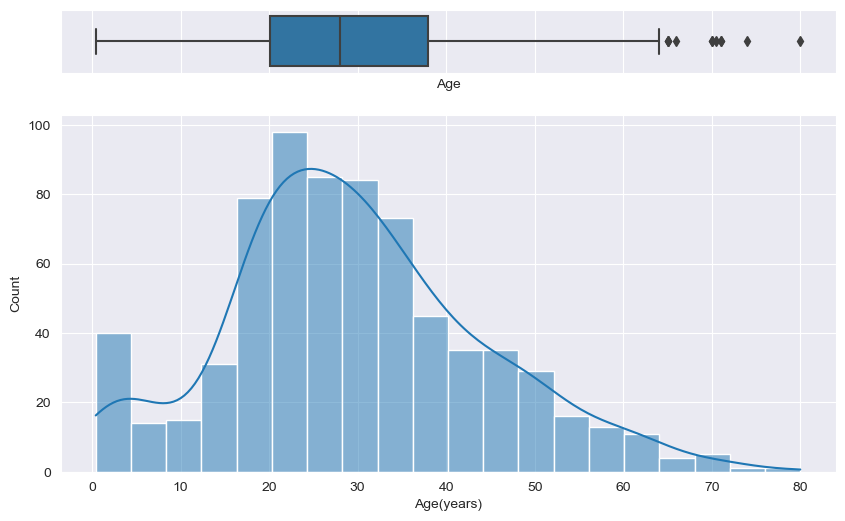

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")
sns.boxplot(data=df, x="Age", ax=ax_box)
sns.histplot(data=df, x="Age", kde=True, ax=ax_hist)
ax_box.set(xlabel="Age")
plt.xlabel("Age(years)")

plt.show()

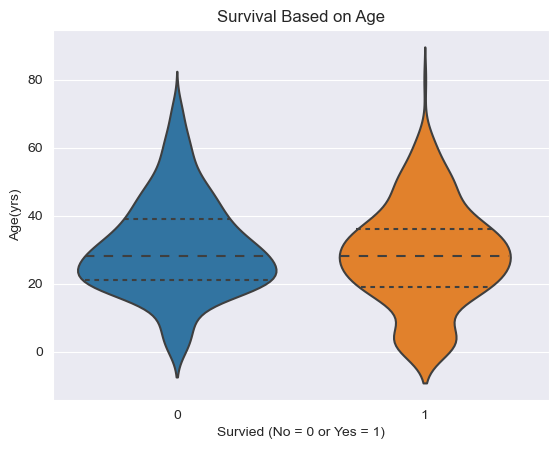

In [20]:
sns.violinplot(data=df, x='Survived', y= "Age" , inner='quartile')
plt.title("Survival Based on Age")
plt.xlabel("Survied (No = 0 or Yes = 1)")
plt.ylabel("Age(yrs)")

plt.show()

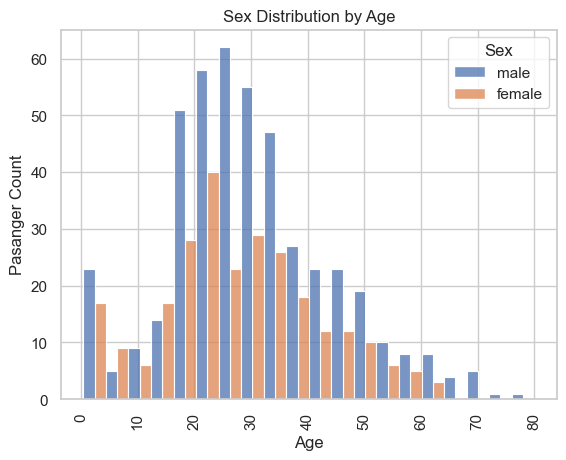

In [21]:
# Let's look at the sex distribution by age range
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Age", hue="Sex", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Pasanger Count")
plt.title("Sex Distribution by Age")
plt.show()

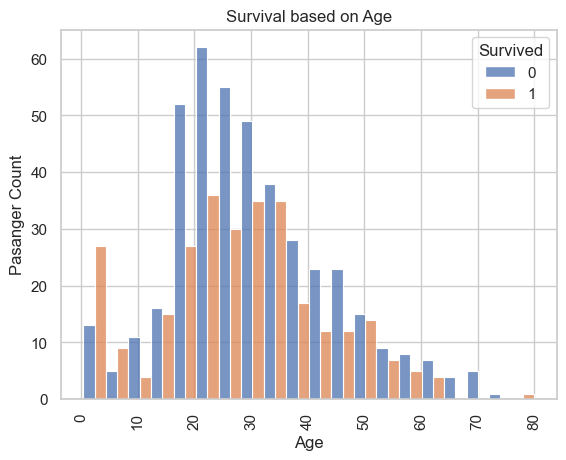

In [22]:
#Let's look that the survival rate agains the age distribution
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Age", hue="Survived", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Pasanger Count")
plt.title("Survival based on Age")
plt.show()

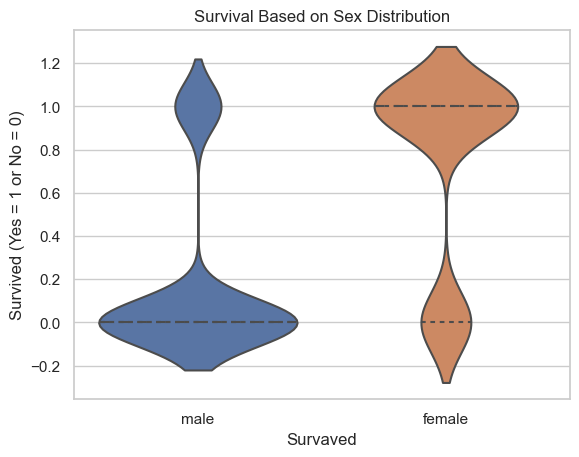

In [23]:
# Same as previous graph just different perspective
sns.violinplot(data=df, x='Sex', y= "Survived" , inner='quartile')
plt.title("Survival Based on Sex Distribution")
plt.xlabel("Survaved")
plt.ylabel("Survived (Yes = 1 or No = 0)")

plt.show()

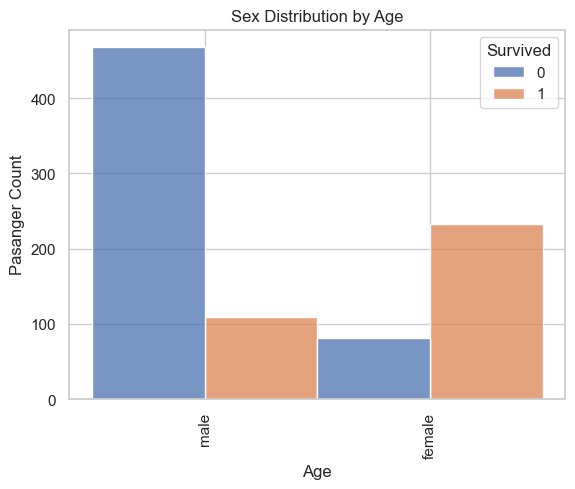

In [24]:
# Let's look at how many survivals vased on sex alone
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Sex", hue="Survived", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Pasanger Count")
plt.title("Sex Distribution by Age")
plt.show()

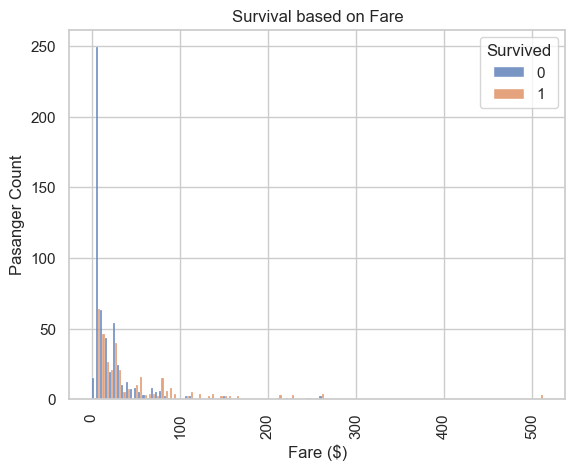

In [25]:
#Let's look that the survival rate agains the Fare paid
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Fare", hue="Survived", multiple="dodge")
plt.xticks(rotation=90)
plt.xlabel("Fare ($)")
plt.ylabel("Pasanger Count")
plt.title("Survival based on Fare")
plt.show()

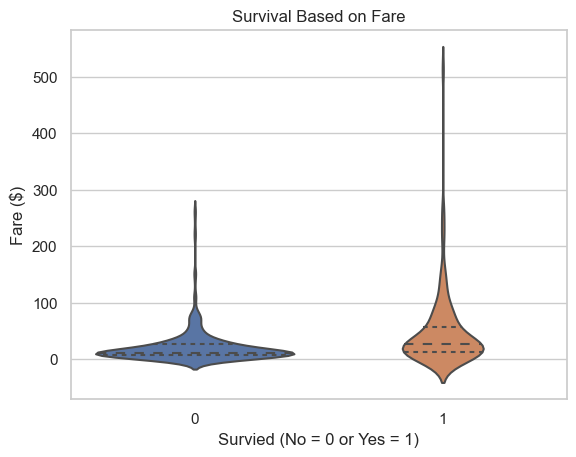

In [26]:
sns.violinplot(data=df, x='Survived', y= "Fare" , inner='quartile')
plt.title("Survival Based on Fare")
plt.xlabel("Survied (No = 0 or Yes = 1)")
plt.ylabel("Fare ($)")

plt.show()

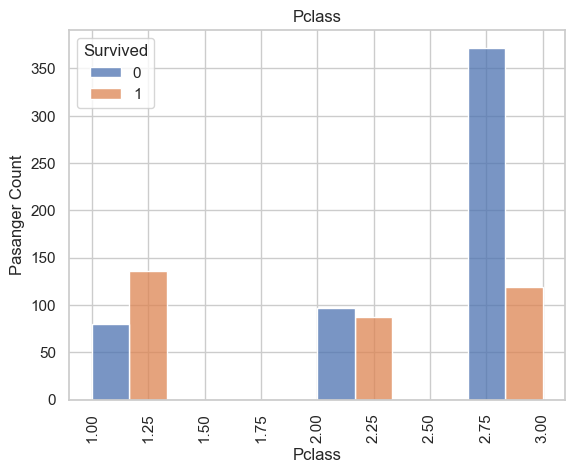

In [27]:
#Let me look at Pclass
sns.set_theme(style="whitegrid")
sns.histplot( df, x="Pclass", hue="Survived", multiple="dodge", bins=6)
plt.xticks(rotation=90)
plt.xlabel("Pclass")
plt.ylabel("Pasanger Count")
plt.title("Pclass")
plt.show()

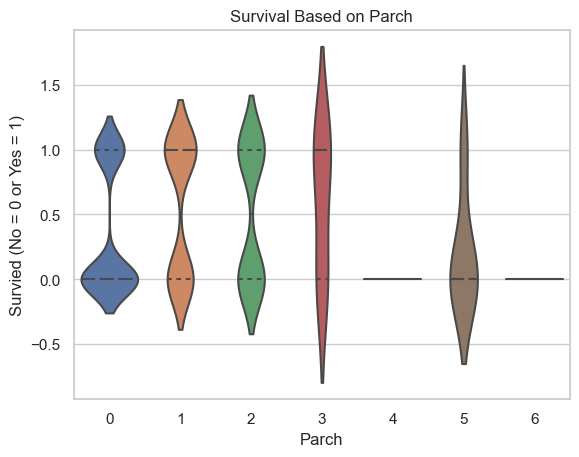

In [28]:
#Let me look at Parch category

sns.violinplot(data=df, y='Survived', x= "Parch" , inner='quartile')
plt.title("Survival Based on Parch")
plt.xlabel("Parch")
plt.ylabel("Survied (No = 0 or Yes = 1)")

plt.show()

In [29]:
#Build a Randome Forest model

In [30]:
# Going to create a copy of df and drop Cabin, Passanger ID, Name, Ticket column 
data = df
data.drop(['Cabin'], axis=1, inplace = True) 
data.drop(['PassengerId'], axis=1, inplace = True) 
data.drop(['Name'], axis=1, inplace = True) 
data.drop(['Ticket'], axis=1, inplace = True) 
data.drop(['Embarked'], axis=1, inplace = True) 
# I try to fill the nan values from Age with the average but the problem was that 
# my models kept overfitting so I just got rid of all together.
data.drop(['Age'], axis=1, inplace = True)  

In [31]:
#Isolate the Target Variable
X = data.drop(["Survived"], axis=1)
y = data["Survived"]
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
# Categorical variables are encoded as dummies
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(623, 5) (268, 5)


In [32]:
X_train

,Pclass,SibSp,Parch,Fare,Sex_male
472,2,1,2,27.75000,0
597,3,0,0,0.00000,1
843,3,0,0,6.43750,1
112,3,0,0,8.05000,1
869,3,1,1,11.13330,1
...,...,...,...,...,...
650,3,0,0,7.89580,1
241,3,1,0,15.50000,0
265,2,0,0,10.50000,1
15,2,0,0,16.00000,0


In [33]:
X_test

,Pclass,SibSp,Parch,Fare,Sex_male
433,3,0,0,7.12500,1
221,2,0,0,13.00000,1
217,2,1,0,27.00000,1
376,3,0,0,7.25000,0
447,1,0,0,26.55000,1
...,...,...,...,...,...
639,3,1,0,16.10000,1
770,3,0,0,9.50000,1
850,3,4,2,31.27500,1
228,2,0,0,13.00000,1


In [34]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], 
                yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [36]:
decision_tree = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       384
           1       0.90      0.91      0.91       239

    accuracy                           0.93       623
   macro avg       0.92      0.92      0.92       623
weighted avg       0.93      0.93      0.93       623



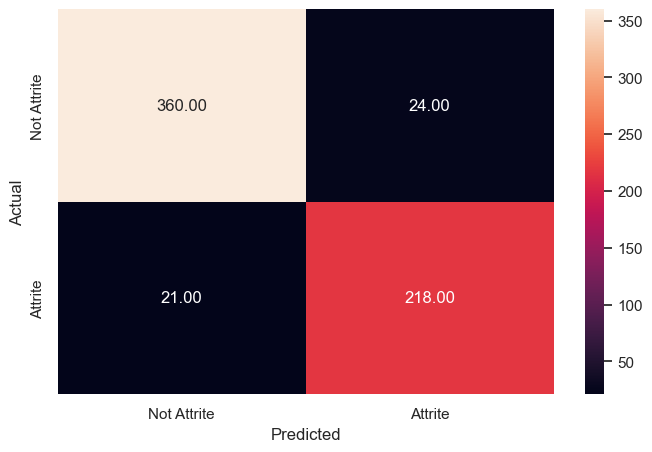

In [37]:
y_pred_train1 = decision_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

In [39]:
# Choose the type of classifier
estimator1 = DecisionTreeClassifier(random_state=1, class_weight='balanced')

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['entropy', 'gini'],
    'min_samples_split': [5, 10, 20, 40],
}
# Run the grid search
grid_obj = GridSearchCV(estimator1, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
tuned_tree = grid_obj.best_estimator_

# Fit the best algorithm to the data
tuned_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       384
           1       0.66      0.88      0.76       239

    accuracy                           0.78       623
   macro avg       0.78      0.80      0.78       623
weighted avg       0.81      0.78      0.78       623



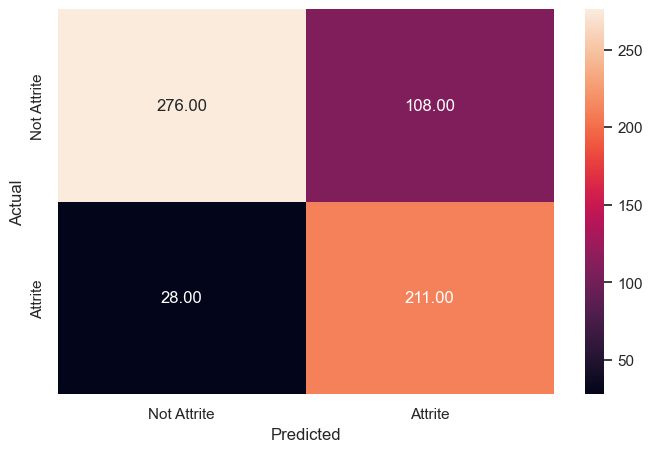

In [40]:
y_pred_train2 = tuned_tree.predict(X_train)
metrics_score(y_train, y_pred_train2)

In [42]:
# Function to render the tree graphically
def render_decision_tree(estimator, columns):
    feature_names = columns.tolist()
    plt.figure(figsize=(20, 10))
    out = tree.plot_tree(
        estimator,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
         arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()

# Function to render the tree as text
def render_tree_as_text(estimator, columns):
    return tree.export_text(estimator, feature_names=X_train.columns.tolist(), show_weights=True)
    
render_decision_tree(tuned_tree, X_train.columns)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 16)